---
# Jupyter-Notebook-Tutorial:   
#    Anpassung von Modellen an Daten mit phyFit 

                                                Günter Quast, Juni 2021
---
## Grundsätzliches zu Jupyter Notebooks

Diese Datei vom Typ `.ipynb` enthält ein Tutorial als `Jupyter notebook`.
*Jupyter* bietet eine Browser-Schnittstelle mit einer (einfachen) Entwicklungsumgebung
für *Python*-Code und erklärende Texte im intuitiven *Markdown*-Format.
Die Eingabe von Formeln im *LaTeX*-Format wird ebenfalls unterstützt.

Eine Zusammenstellung der wichtigsten Befehle zur Verwendung von *Jupyter* als Arbeitsumgebung
findet sich im Notebook
[*JupyterCheatsheet.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/JupyterCheatsheet.ipynb).
Grundlagen zur statistischen Datenauswertung finden sich in den Notebooks 
[*IntroStatistik.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/IntroStatistik.ipynb)
und
[*Fehlerrechnung.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/Fehlerrechnung.ipynb).

In *Jupyter* werden Code und Text in jeweils einzelne Zellen eingegeben. 
Aktive Zellen werden durch einen blauen Balken am Rand angezeigt.
Sie können sich in zwei Zuständen befinden: im Edit-Mode ist das Eingabefeld weiß, im
Command-Mode ist es ausgegraut.
Durch Klicken in den Randbereich wird der Command-Mode gewählt, ein Klick in das Textfeld einer
Code-Zelle schaltet in den Edit-Mode.
Die Taste `esc` kann ebenfalls verwendet werden, um den Edit-Mode zu verlassen.

Die Eingabe von `a` im Command-Mode erzeugt eine neue leere Zelle oberhalb der aktiven Zelle, `b`
eine unterhalb. Eingabe von `dd` löscht die betreffende Zelle.

Zellen können entweder den Typ `Markdown` oder `Code` haben.
Die Eingabe von `m` im Command-Mode setzt den Typ Markdown, Eingabe von `y` wählt den Typ Code.

Prozessiert - also Text gesetzt oder Code ausgeführt - wird der Zelleninhalt durch Eingabe von
`shift+return`, oder auch `alt+return` wenn zusätzlich eine neue, leere Zelle erzeugt werden soll.

Die hier genannten Einstellungen sowie das Einfügen, Löschen oder Ausführen von Zellen sind
auch über das PullDown-Menü am oberen Rand verfügbar.

---

# Anmerkungen zur Anpassung von Modellen an Messdaten
***
Die Physik als `Theorie-geleitete Erfahrungswissenschaft` lebt vom
Zusammenspiel theoretischer Hypothesenbildung und deren stringenter
Überprüfung im Experiment. Bei der Interpretation von Messdaten kommt
es also zunächst darauf an, ob sie einem erwarteten Modell
entsprechen. Erst, wenn diese Frage mit 'ja' beantwortet werden kann, 
ist die Extraktion vom Modellparametern überhaupt erst sinnvoll.

Leider tragen die meisten der häufig verwendeten Werkzeuge  in der 
Voreinstellung dieser Anforderung nicht Rechnung, sondern
zielen auf eine möglichst genaue Parametrisierung der Daten ab. 
Bei Vorgabe von unpassenden Modellen werden dazu die Parameterfehler
so weit vergrößert, dass die Parametrisierung möglichst genau passt.

Um den besonderen Bedingungen der Datenauswertung in der Physik
gerecht zu werden, ist die Verwendung von eigenem Programmcode, 
idealerweise in der Programmiersprache {\em Python} in einem 
Jupyter-Notebook, häufig notwendig, da die meisten mittels einer
grafischen Oberfläche zu bedienenden Werkzeuge zur statistischen
Datenauswertung den Anforderungen nicht oder nur zum Teil genügen. 

Wichtige Punkte sind:

- Alle Messunsicherheiten sollten direkt bei der Modellanpassung berücksichtigt
  und entsprechend modelliert werden, um sie vollständig und korrekt auf die
  Unsicherheiten der Parameter zu propagieren. Eine später von Hand
  durchgeführte Fehlerfortpflanzung ist aufwändig und funktioniert nur
  in einfachsten Fällen.   
- Die verwendeten Werkzeuge müssen dazu insbesondere auch Unsicherheiten
  in Abszissenrichtung zusätzlich zu Unsicherheiten in Ordinatenrichtung
  behandeln können. Die Unterstützung von korrelierten Unsicherheiten
  ist ebenfalls notwendig, um typische Unsicherheiten von Messgeräten -
  also unabhängige Digitalisierungsunsicherheiten und Rauschbeiträge
  sowie korrelierte Kalibrationsunsicherheiten - darstellen zu können.
- Häufig treten auch relative Unsicherheiten auf, z.$\,$B. bei
  Kalibrationsunsicherheiten, die als Bruchteil des wahren Messwertes
  auftreten. Wenn solche relative Unsicherheiten korrekt behandelt werden
  sollen, geht das mit der Methode der kleinsten Fehlerquadrate nur noch
  näherungsweise. Exakte Parameterschätzungen beruhen auf der
  Maximum-Likelihood-Methode (`MLE', Maximum Likelihood Estimation).
- In der Quanten-, Kern- und Teilchenphysik treten als Messgrößen
  Zählraten in Abhängigkeit von Energie, Streuwinkel oder anderen
  Größen auf, die üblicherweise als Häufig\-keits\-ver\-teilung (Histogramm)
  dargestellt werden. Die Einträge in einem Intervall eines Histogramms
  (einem sog. `Bin`) sind aber nicht Gauß-, sondern Poisson-verteilt. Auch
  näherungsweise können Bins mit Null Einträgen mit einer - oft immer
  noch verwendeten - angepassten Methode der kleinsten Fehlerquadrate
  nicht berücksichtigt werden. Zur Anpassung von Modellen an Histogramme
  müssen also ebenfalls maximum-likelihood Methoden angewendet werden.

- Bei der Analyse von sehr kleinen Zählraten bei nur selten eintretenden
  Ereignissen kann schon die Notwendigkeit zur Aufteilung in Bins zur einem
  Informationsverlust und zu einer Verzerrung des Ergebnisses führen.
  In solchen Fällen sollte ein ungebinnter Maximum-Likelihod-Fit zur
  Anwendung kommen.

Leider gibt es kaum Anpassungswerkzeuge, die alle genannten Anforderungen
gleichzeitig erfüllen. Deshalb wurde am ETP in zahlreichen Bachelor-Arbeiten
ein quelloffenes Anpassungswerkzeug, `kafe2`} entwickelt, das die genannten 
Aspekte abdeckt. Allerdings ist der Programmcode wegen der großen Zahl an 
Optionen und Methoden sehr komplex und für Einsteiger unübersichtlich.

Zur Illustration der Vorgehensweise wird daher in diesem Tutorial ein
einziges, sehr flexibles Werkzeug zur numerischen Optimierung und 
Analyse der Parameterunsicherheiten verwendet, nämlich das am CERN 
entwickelte Paket `Minuit` bzw. dessen Python-Interface `iminuit`.


# Mathematische Grundlagen der Parameterschätzung
***

Beginnen wir an dieser Stelle mit einem Top-Down-Ansatz. Ausgehend vom 
Maximum-Likelihood-Prinzip stellen wir dann die Verbindung zu altbekannten 
Methoden her. In der konkreten Anwendung muss dann überlegt werden, 
welche Vereinfachungen für eine gegebe Problemstellung möglich sind.

Ausgangspunkt ist der Formalismus zur Parameterschätung von Verteilungsdichten, 
die Messergebnissen zu Grunde liegen. Manchmal sind die Parameter der 
Verteilungsdichte selbst interessant, z.$\,$B. bei der Lebensdauerverteilung 
von quantenmechanischen Zuständen oder von (Elementar-)Teilchen.
Häufig treten Parameter von Verteilungsdichten aber auch nur als 
`Störparameter` auf, die statistische Fluktuationen um einen angenommenen
wahren Wert beschreiben. Die Behandlung von Messunsicherheiten ist dafür 
ein Beispiel. 

## Grundlagen des Maximum-Likelihood Verfahrens: Schätzung der Parameter einer Verteilungsdichte 

Wir gehen von einer Verteilungsdichte ${\rm pdf}(x, \vec p)$ aus,
die von einer Anzahl von Parametern $p_j$ abhängt. Ein Datensatz
$\vec x$ beseht aus ${n_d}$ voneinander unabhängigen
Einzelmessungen $x_i$.

Nach dem Maximum Likelihood-Prinzip ist der beste Schätzwert der
Parameter, ${\hat{ \vec {p}}}$, gegeben durch die Werte, die die
sog. `Likelihood`, das Produkt der Werte der $pdf$ für die
Einzelmessungen, ${\rm pdf}(x_i, \vec p)$, maximieren:

\begin{equation}\label{equ:Likelihood1}
  {\cal L}(\vec x, \vec p) =
  \displaystyle\prod_{i=1}^{n_d} \, {\rm pdf}(x_i, \vec p) \,.
\end{equation}  

Um unhandlich kleine Werte des Produkts zu vermeiden, aus Gründen
der numerischen Stabilität und auch aus mathematischen Gründen
(s. "Fisher-Information") verwendet man den negativen Logarithmus
von $\cal L$, die `negative log-Likelihood` $nl\cal L$, gegeben durch
\begin{equation}\label{equ:Likelihood2}
  {nl\cal L}(\vec x, \vec p) =
  -\displaystyle\sum_{i=1}^{n_d} \, \ln\left({\rm pdf}(x_i, \vec p)\right) \,.
\end{equation}  

Die negative log-Likelihood-Funktion wird dann als Funktion der Parameter
aufgefasst und bezüglich der Parameter minimiert. Üblicherweise verwendet
man sie als Kostenfunktion in numerischen Optimierungsverfahren.

Es lässt sich zeigen, dass das log-Likelihood-Verfahren unter allen 
Verfahren zur Parameterschätzung optimal ist, also die kleinste Varianz 
der Parameterwerte liefert. Auch dies ist ein Grund, dem Likelihood-Verfahren
den Vorzug zu geben, wenn man maximalen Informationsgewinn aus bisweilen
extrem aufwändigen und damit teuren Experimenten ziehen möchte.


Für ein digitales Tutorial ist an dieser Stelle Zeit für ein konkretes Beispiel.
Wir betrachten Daten, an die eine Gauß-Verteilung angepasst wird. 

Mit Hilfe des folgen Codefragments werden zunächst die Daten erzeugt:

In [1]:
import numpy as np
# generate Gaussian-distributed data
mu0=2.
sig0=0.5
np.random.seed(314159)  # initialize random generator
data = mu0 + sig0 * np.random.randn(100)


Die Likelihood der Gaussverteilung mit Erwartungswert $mu$ und Standardabweichung 
$sigma$ sieht folgendermaßen aus:

In [2]:
# define cost function: 2 * negative log likelihood of Gauß;
def myCost(mu=1., sigma=1.):
  # simple -2*log-likelihood of a 1-d Gauss distribution
  r = (data-mu)/sigma
  return np.sum( r*r + 2.*np.log(sigma))

Obwohl in diesem Fall eine analytische Minimierung der Kostenfunktion möglich wäre,
verwenden wir eine numerische Minimierung, die das Interface `mFit` ais dem Paket `PhyPraKit.phyFit` für das Minimierungswerkzeut *iminuit* nutzt. Übergeben wird
lediglich die die Kostenfunktion; Rückgabewerte sind die Namen und optimalen Parameterwerte, die in der Kostenfunktion als `Keyword-Arguments` angebeben sind.
Weiter zurückgegeben wird eine Schätzung der Parameterunsicherheiten und die Qualität der Anpassung, über die weiter unten noch gesprochen werden wird. 

In [3]:
from PhyPraKit.phyFit import mFit  

pnams, pvals, perrs, cor, gof = mFit(myCost)

# Print results
print('\n*==* user-defined cost: Fit Result:')
print(" parameter names:       ", pnams)
print(" parameter values:      ", pvals)


*==* user-defined cost: Fit Result:
 parameter names:        ('mu', 'sigma')
 parameter values:       [2.04270359 0.49920607]


Die Ausgabe zeigt, dass die so bestimmten Parameterwerte den für die Erzeugung
der Daten verwendeten Paramtern entspricht. 

## Bestimmung der Parameterunsicherheiten und Intervallschätzung

Neben den besten Werten aller Parameter sind ebenso deren Unsicherheiten
bedeutsam. Die Varianz der Parameter, oder besser die Kovarianzmatrix
der Unsicherheiten aller Parameter, lässt sich aus dem Verlauf der
log-Likelihood am Minimum bestimmen. Anschaulich ist ein Parameter
um so genauer bestimmt, je "schärfer" das Minimum ausgeprägt ist;
dies kann über die zweiten Ableitungen der log-Likelihood nach den
Parametern quantifiziert werden: 

\begin{equation}\label{equ-Vij}
{V_{ij}}^{-1}={\left. 
\frac {{\partial}^2 \ln{\cal{L}}()}
{\partial p_i \, \partial p_j} 
\right|}_{\hat p_i \hat p_j}\,.
\end{equation}

Korrelationen zwischen den Parametern sind auch bei unkorrelierten
Messwerten sehr häufig. Wenn Korrelationen besonders groß sind, weist
dies auf eine ungeschickte Parametrisierung des Problems hin. Bei
Korrelationen größer als 10% sollten die als Teil des Ergebnisses
kommuniziert werden, weil die Form der innerhalb eines vorgegebenen
Konfidenzniveaus noch zulässigen Parameterbereiche davon abhängt. 

Bei nichtlinearen Problemstellungen, die schon bei der Berücksichtigung
von Unsicherheiten in Abszissenrichtung oder von modellbezogenen relativen
Unsicherheiten auftreten, ist der Verlauf der log-Likelihood am Minimum
nicht parabolisch. In solchen Fällen ist die Angabe eines symmetrischen
Intervalls für die Unsicherheiten nicht korrekt. Zur Einschätzung
möglicher Probleme sollte auf jeden Fall eine grafische Darstellung des 
Verlaufs der Likelihood am Minimum betrachtet werden.

Als Größe dafür bietet sich die Profil-Likelihood an; bei diesem Verfahren
wird für jeden Parameter eine Anzahl von Punkten in der Nähe des Minimums
betrachtet und die log-Likelihood bezüglich aller anderen Parameter
minimiert - auf diese Weise werden Korrelationen mit anderen Parametern
berücksichtigt. Das Vertrauensintervall, das dem Bereich plus-minus einer
Standardabweichung einer Gaußverteilung um den Parameterwert, also
einem Konfidenzniveau von 68.3% entspricht, erhält man an den Stellen,
an denen die log-Likelihood um den Wert $\frac{1}{2}$ größer ist als
am Minimum. Für nicht-parabolische Verläufe ergibt sich aus der Analyse
der Profil-Likelihood ein asymmetrisches Konfidenzintervall um den
Parameterwert am Minimum, das in solchen Fällen an Stelle der aus
den zweiten Ableitungen bestimmen Standardabweichungen der Parameter
angegeben werden sollte.

Das Verfahren der Profil-Likelihood lässt sich auch in zwei Dimensionen,
also für Paare von Parametern durchführen. Man erhält dann Konturlinien,
die Konfidenzbereiche analog zu ein- oder auch zwei-sigma-Konturen
von Gauß-förmigen Verteilungen entsprechen. Bei starker Abweichung
der Konturen sollten sie zusammen mit dem Ergebnis berichtet werden,
weil der Zulässige Parameterbereich davon abhängt.

Profile-Likelihood-Kurven und Konfidenzkonturen lassen sich mit dem oben 
gezeigten Code leicht erzeugen, wenn zusätzliche Optionen angegeben werden:

<Figure size 432x288 with 0 Axes>

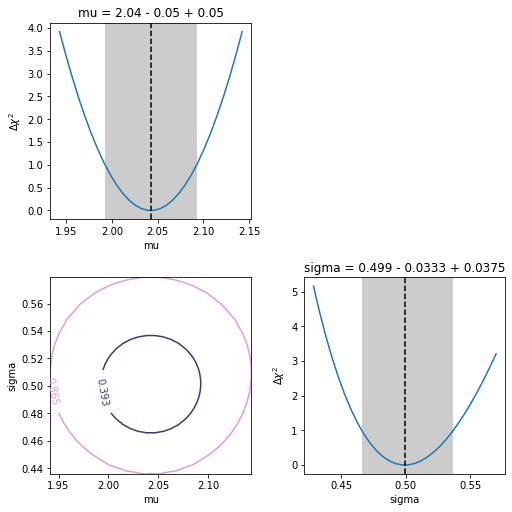


*==* user-defined cost: Fit Result:
 parameter names:        ('mu', 'sigma')
 parameter values:       [2.04270359 0.49920607]
 neg. parameter errors:  [-0.05004574 -0.03330733]
 pos. parameter errors:  [0.05004667 0.03750804]
 correlations : 
 [[1.00000000e+00 2.16468893e-04]
 [2.16468893e-04 1.00000000e+00]]


In [4]:
pnams, pvals, perrs, cor, gof = mFit(myCost, plot_cor=True)

# Print results
print('\n*==* user-defined cost: Fit Result:')
print(" parameter names:       ", pnams)
print(" parameter values:      ", pvals)
print(" neg. parameter errors: ", perrs[:,0])
print(" pos. parameter errors: ", perrs[:,1])
print(" correlations : \n", cor)  


### log-LikelihoodFit: Beispiel 2

Wir wollen nun ein etwas komplexeres Beispiel anschauen. 
Als Daten verwenden wir Messugnen der Lebensdauern von gestoppten 
kosmischen Myonen, die in einem Wasser-Cherenkov-Detektor (in diesem Fall 
einer Kaffeekanne mit Photomultiplier) nachgewiesen wurden. Beim Durchgang 
durch das Wasser erzeugen die Myonen ein Lichtsignal; wenn sie im Wasser
oder im Boden darunter gestoppt werden, können Elektronen aus den zerfallenden
Myonen wieder in den Detektor gelangen und nachgewiesen werden. Die Daten
entsprechen den Zeitdifferenzen (in µs) solcher Doppelpulse. Zufällig
eintreffende Myonen und Detektoruntergrund erzeugen zufällige Doppelpulse, 
die im Gegensatz zu den Lebensdauern aber flach verteilt sind. 

Die relevante, auf Eins normierte Verteilungsdichte und die Daten finden 
sich in der folgenden Code-Zelle gezeigt:

In [5]:
def exponentialDecayPDF(t, tau=2., fbg=0.2, a=1., b=11.5):
  """Probability density function 

  for an exponential decay with flat background. The pdf is normed for 
  the interval [a=1µs,  b=11.5µs); these parameters a and b must be 
  fixed in the fit! 
   """

  pdf1 = np.exp(-t / tau) / tau / (np.exp(-a / tau) - np.exp(-b / tau))
  pdf2 = 1. / (b - a)
  return (1 - fbg) * pdf1 + fbg * pdf2

# real data from measurement with a Water Cherenkov detector ("Kamiokanne")
dT=[7.42, 3.773, 5.968, 4.924, 1.468, 4.664, 1.745, 2.144, 3.836, 3.132,
    1.568, 2.352, 2.132, 9.381, 1.484, 1.181, 5.004, 3.06,  4.582, 2.076,
    1.88,  1.337, 3.092, 2.265, 1.208, 2.753, 4.457, 3.499, 8.192, 5.101,
    1.572, 5.152, 4.181, 3.52,  1.344, 10.29, 1.152, 2.348, 2.228, 2.172,
    7.448, 1.108, 4.344, 2.042, 5.088, 1.02,  1.051, 1.987, 1.935, 3.773,
    4.092, 1.628, 1.688, 4.502, 4.687, 6.755, 2.56,  1.208, 2.649, 1.012,
    1.73,  2.164, 1.728, 4.646, 2.916, 1.101, 2.54,  1.02,  1.176, 4.716,
    9.671, 1.692, 9.292, 10.72, 2.164, 2.084, 2.616, 1.584, 5.236, 3.663,
    3.624, 1.051, 1.544, 1.496, 1.883, 1.92,  5.968, 5.89,  2.896, 2.76,
    1.475, 2.644, 3.6,   5.324, 8.361, 3.052, 7.703, 3.83,  1.444, 1.343,
    4.736, 8.7,   6.192, 5.796, 1.4,   3.392, 7.808, 6.344, 1.884, 2.332,
    1.76,  4.344, 2.988, 7.44,  5.804, 9.5,   9.904, 3.196, 3.012, 6.056,
    6.328, 9.064, 3.068, 9.352, 1.936, 1.08,  1.984, 1.792, 9.384, 10.15,
    4.756, 1.52,  3.912, 1.712, 10.57, 5.304, 2.968, 9.632, 7.116, 1.212,
    8.532, 3.000, 4.792, 2.512, 1.352, 2.168, 4.344, 1.316, 1.468, 1.152,
    6.024, 3.272, 4.96, 10.16,  2.14,  2.856, 10.01, 1.232, 2.668, 9.176 ]


Die Anpassung mit Hilfe des log-Likelihood-Verfahrens funktioniert genau so 
wie oben. Dieses Mal werden allerdings an Stelle der Kostenfunktion die Daten
und die Verteilungsdichte angegeben sowie Optionen zur grafischen Darstellung 
als Parameter angegeben. Damit die Anpassung funktioniert, muss das
Anpassungswerkzeug einige besondere Optionen unterstützen: 
- die Begrenzung von Parametern auf einen sinnvollen Bereich   
  (Option `limits=('fbg', 0., 1.)`) und 
- die Fixierung von Paramtern, die in der Anpassung nicht variiert 
  werden, in diesem Fall das Intervall, in dem die Messungen verlässlich sind
  und auf das die Verteilungsdiche normiert ist,   
  (Option `fixPars = ['a', 'b']`).
  
Hier nun der vollständige Programmcode zur Anpassung einer Verteilungsdichte
an (ungebinnte) Daten:

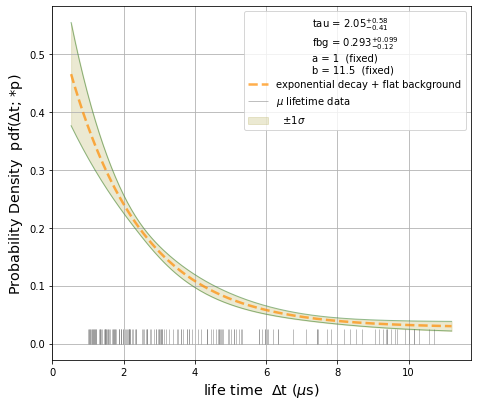

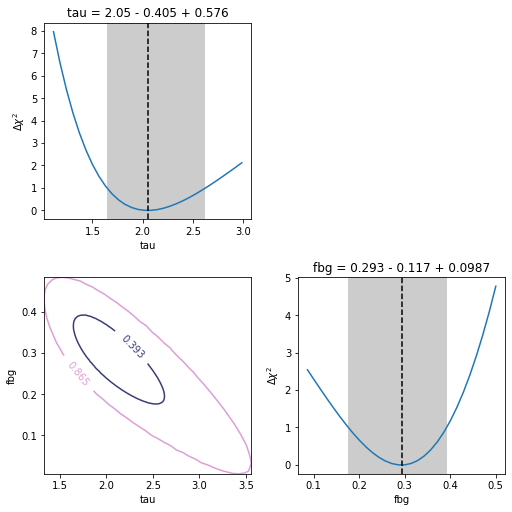


*==* unbinned ML Fit Result:
 parameter names:        ['tau' 'fbg' 'a' 'b']
 parameter values:       [ 2.04952279  0.29330093  1.         11.5       ]
 neg. parameter errors:  [-0.40510342 -0.1168369 ]
 pos. parameter errors:  [0.57553675 0.09874637]
 correlations : 
 [[ 1.         -0.77785875]
 [-0.77785875  1.        ]]


In [6]:
pnams, pvals, perrs, cor, gof = mFit( exponentialDecayPDF,
       data = dT, # data - if not None, a normalised PDF is assumed as model  
       limits=('fbg', 0., 1.),  # parameter limits
       fixPars = ['a', 'b'],    # fix parameter(s) 
       neg2logL = True,         # use  -2 * ln(L)
       plot=True,               # plot data and model
       plot_band=True,          # plot model confidence-band
       plot_cor=True,          # plot profiles likelihood and contours
       axis_labels=['life time  ' + '$\Delta$t ($\mu$s)', 
                       'Probability Density  pdf($\Delta$t; *p)'], 
       data_legend = '$\mu$ lifetime data',    
       model_legend = 'exponential decay + flat background' )
# Print results
print('\n*==* unbinned ML Fit Result:')
print(" parameter names:       ", pnams)
print(" parameter values:      ", pvals)
print(" neg. parameter errors: ", perrs[:,0])
print(" pos. parameter errors: ", perrs[:,1])
print(" correlations : \n", cor)  


Anders als bei der Anpassung der Gaußverteilung an Gauß-verteilte Daten zeigen die Profil-Likelihood und die Konturen in diesem Fall eine starke Abweichung von linearem Verhalten. In einem solchen Fall ist die Bereitstellung der Grafiken
zusätzlich zur Angabe der numerischen Ergebnisse notwendig. Auch die stark
asymmetrischen Unsicherheiten müssen unbedingt angegeben werden.  

## Anpassung von Verteilungsdichten an Histogramme

Ein weiteres typisches Beispiel für die Anwendung der log-Likelihood-Methode
ist die Behandlung von Problemen, bei denen Poisson-verteilte Größen
auftreten. Dies sind z.$\,$B. die Anzahlen von Einträgen in einzelnen
Intervallen von Häufigkeitsverteilungen (Histogramme).

Die Poissonverteilung von Anzahlen $n_i$ mit Erwartungswerten $\mu_i$
ist gegeben durch

\begin{equation}\label{equ-Poisson}
  P(n_i;\mu_i)=\frac{{\mu_i}^{n_i}} {n_i\,!} \, {\rm e}^{-\mu_i} \,.
\end{equation}

Durch Bilden des Produkts über alle (als statistisch unabhängig
angenommenen) Bins eines Histogramms erhält man die Likelihood 

\begin{equation}\label{equ-LPoisson}
  {\cal{L}}_{Poisson}=\displaystyle\prod_{i=1}^N
  {\rm P}\left(n_i;\mu_i(\vec
p)\right)\, ,
\end{equation}

und schließlich durch Logarithmieren die log-Likelihood der
Poisson-verteilten Anzahlen der Einträge in den Bins eines Histogramms
\begin{equation}\label{equ-nlLPoisson}
nl{\cal{L}}_{Poisson}= -\ln {\cal{L}}_{Poisson} =
\displaystyle\sum_{i=1}^N - n_i \cdot \ln(\mu_i(\vec p))\,+\,\mu_i(\vec p) \,.
\end{equation}

Bei Verwendung dieser Kostenfunktion im Minimierungsprozess können also
Anpassungen von Verteilungsdichten an Histogramme ganz analog wie bei
der Verwendung der oben bereits diskutierten Likelihood zur Anpassung
von Verteilungsdichten an Messdaten durchgeführt werden, die in diesem
Fall aber als Historgramm vorliegen. 
Der Rechenaufwand hängt in diesem Beispiel von der Zahl der Bins und
nicht - wie im ersten Beispiel - von der Größe des Datensatzes ab. 


### Beispiel: Anpassung an Histogramm-Daten

Die Anpassung eines Modells an histogrammierte Daten wird durch die Funktion
*hfit()* aus dem Paket *PhyPraKit.phyFit* unterstützt. Die Vorgehensweise ist ganz
analog zur Anpassung von ungebinnten Daten. Von Anwenderseite müssen lediglich
die Daten und die Verteilungsdichte bereit gestellt sowie Angaben zu den  Ausgabeoptionen gemacht werden. Die passenden Kostenfunktionen, also das zweifache
des negativen natürlichen Logarithmus der Poissonverteilung - oder, oft in 
ausreichender Näherung der Gaußverteilung - sind in *hfit* implementiert. 

Hier das vollständige Progammbeispiel:

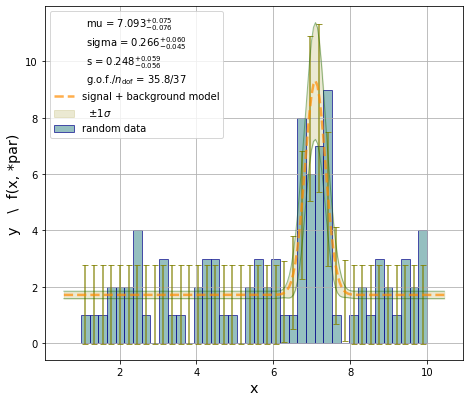

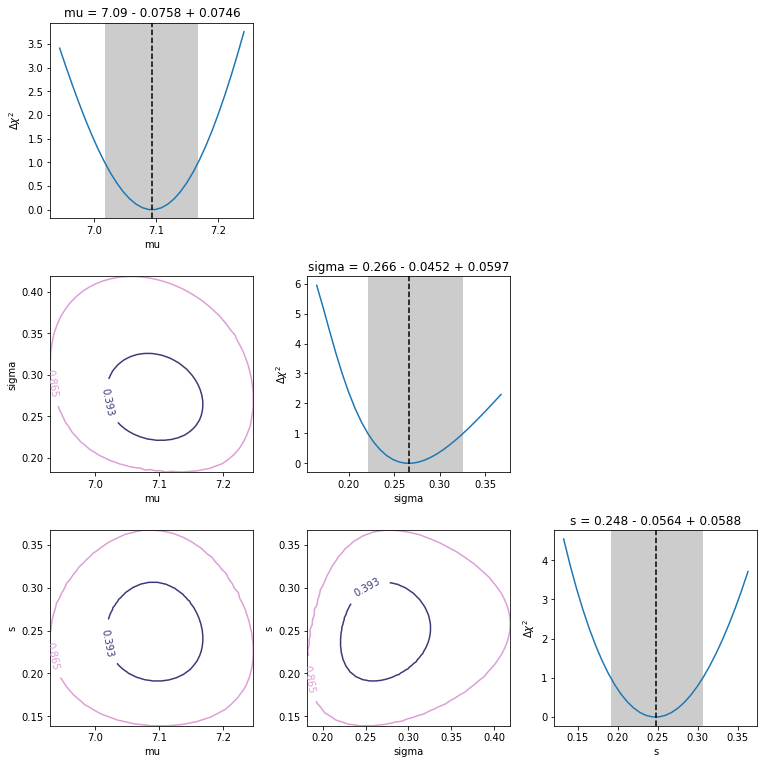


*==* histogram fit Result:
 parameter names:        ('mu', 'sigma', 's')
 goodness-of-fit: 35.8
 parameter values:       [7.09318268 0.26616618 0.24752865]
 neg. parameter errors:  [-0.07576177 -0.04522509 -0.05639215]
 pos. parameter errors:  [0.07459797 0.05966178 0.0587992 ]
 correlations : 
 [[ 1.         -0.12026283 -0.04425516]
 [-0.12026283  1.          0.12755051]
 [-0.04425516  0.12755051  1.        ]]


In [7]:
from PhyPraKit.phyFit import hFit

#  the model function to fit
def SplusB_model(x, mu = 6.987, sigma = 0.5, s = 0.2):
  '''pdf of a Gaussian signal on top of flat background
  '''
  normal = np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2.*np.pi*sigma**2)
  linear = 1. / (xmx-xmn) 
  return s * normal + (1-s) * linear 

nbins=40
xmn = 1
xmx = 10
bedges=np.linspace(xmn, xmx, nbins+1)
bcontents = np.array([1, 1, 1, 2, 2, 2, 4, 1, 0, 3, 1, 1, 0,
                        2, 3, 3, 1, 1, 0, 2, 3, 2, 3, 1, 1, 8,
                        6, 7, 9, 1, 0, 1, 2, 1, 3, 2, 1, 3, 2, 4])
#  
# ---  perform fit  
#
pnams, pvals, perrs, cor, gof = hFit(SplusB_model,
    bcontents, bedges,      # bin entries and bin edges
    limits=('s', 0., None), # parameter limits
    plot=True,              # plot data and model
    plot_band=True,         # plot model confidence-band
    plot_cor=True,          # plot profiles likelihood and contours
    axis_labels=['x', 'y   \  f(x, *par)'], 
    data_legend = 'random data',    
    model_legend = 'signal + background model' )

# Print results 
print('\n*==* histogram fit Result:')
print(" parameter names:       ", pnams)
print(" goodness-of-fit: {:.3g}".format(gof))
print(" parameter values:      ", pvals)
print(" neg. parameter errors: ", perrs[:,0])
print(" pos. parameter errors: ", perrs[:,1])
print(" correlations : \n", cor)


## Maximum-Likelihood und Methode der kleinsten Fehlerquadrate

Die Methode der kleinsten Fehlerquadrate zur Anpassung von Modellen ist
ein Spezialfall des maximum-Likelihood Verfahrens.

Leiten wir zunächst ein auf der log-Likelihood basierendes
Anpassungsverfahren für Modellfunktionen an Messdaten her.
Wir bezeichnen die zufällige Abweichung eines Messwertes vom wahren
Wert mit dem Buchstaben $z$, die durch eine Verteilungsdichte $f_z$
beschrieben wird. Im Falle von Messunsicherheiten ist $f_z$ häufig
die Normalverteilung mit Erwartungswert Null und Standardabweichung $\sigma$,
${\cal N}(z; \sigma)$. Im mehrdimensionalen Fall für $n_d$ nicht
notwendigerweise unabhängige Datenpunkte ist die multivariate
Gaußverteilung ${\cal N}(\vec z; V)$ mit der Kovarianzmatrix $V$ relevant,
\begin{equation}\label{equ-mStandardGauss}
  {\cal{N}}\left(\vec{z}, V) \right) = 
\frac{1} {\sqrt{(2\pi)^{n_d} \det(V)} }
\cdot
\exp \left( -\frac{1}{2} \vec{z}^T V^{-1} \vec{z}
\right) \,.
\end{equation}

Die Zufallsgröße $z$ entspricht den Fluktuationen um den
wahren Wert; wenn es dafür eine exakte theoretische Erwartung in Form
eines parameterbehafteten Modells $f_i(\vec p)$ mit einem Satz
an Parametern $\vec p$ gibt, lässt sich ein Messwert $y_i$ schreiben als
\begin{equation}\label{equ-zplusw}
y_i =  f_i(\vec p) + z_i \,.
\end{equation}

Üblicherweise führt man zum Test von parameterbehafteten, durch
Funktionen beschriebenen Modellen mehrere Messungen an verschiedenen
Stützstellen $x_i$ durch, man betrachtet also eine Modellfunktion
$f(\vec x; \vec p)$.
Die Verteilungsdichte, die alle Messungen beschreibt, sieht dann so aus:
\begin{equation}\label{equ-mGauss}
  {\cal{N}}\left(\vec{y}, V, f(\vec{x}, \vec{p}) \right) = 
  \frac{1} {\sqrt{(2\pi)^{n_d} \det(V)} } \cdot
  exp\left( -\frac{1}{2} (\vec{y}-\vec{f})^T V^{-1} (\vec{y}-\vec{f}) \right) \,.
\end{equation}

Nach dem Maximum-Likelihood-Prinzip ist der beste Parametersatz durch
den Punkt $\hat{\vec{ p}}$ im Parameterraum gegeben, für den die Likelihood
maximal wird. Wie schon oben verwendet man den negativen natürlichen
Logarithmus der Likelihood, $nl{\cal L}_{Gauss}$, der dann minimiert wird.
\begin{equation}\label{equ-nlLGauss}
-2\, \ln{\cal{L_{\rm Gauß}}}\left( \vec y, V, \vec{f}(\vec x, \vec {p}) \right)
\,=\, \left(\vec y - \vec f(\vec x; \vec p ) \right)^T V^{-1}
  \left(\vec y - \vec f(\vec x; \vec p ) \right)
  + \ln(\det(V)) + n_d\,\ln(2\pi) \,.
\end{equation}

Für die Bestimmung des Minimums von $nl{\cal L}_{Gauss}$ sind bzgl. der
Parameter konstante Terme nicht relevant, man kann sie daher weglassen.
Wenn die Normierung der Gaußverteilung, also der Term $\det(V)$, nicht
von den Parametern abhängt, vereinfacht sich der Ausdruck in
\ref{equ-lLGauss} bis auf einen Faktor Zwei zum altbekannten Ausdruck
für die quadratische Residuensumme mit Kovarianzmatrix, $S$, die schon
aus den Anfängerpraktika bekannt ist:
\begin{equation}\label{equ-chi2}
S(\vec y, V, \vec{f}(\vec x, \vec {p})\,=\,
  \left(\vec y - \vec f(\vec x; \vec p ) \right)^T V^{-1}
  \left(\vec y - \vec f(\vec x; \vec p ) \right)
  + \ln(\det(V)) + d\,\ln(2\pi) \,.
\end{equation}

Unter ganz speziellen Bedingungen sind also die Minimierung
der Log-Likelihood und der quadratischen Summe der Residuen,
$S$, äquivalent. Dieser einfache Fall ist aber nicht mehr
gegeben, wenn relative, auf den Modellwert bezogene Unsicherheiten
auftreten, oder wenn Unsicherheiten in Abszissen-Richtung
behandelt werden sollen, die mit Hilfe einer Taylor-Entwicklung
erster Ordnung von der Abszisse auf die Ordinate übertragen
und damit von der Ableitung des Modells nach $x$ und so
auch von den Parameterwerten abhängen.
Die praktische Regel lautet daher, möglichst immer die Likelihood
zu verwenden, und nur in gut begründeten, berechtigten Fällen
auf die Methode der kleinsten Fehlerquadrate zurück zu greifen.
Allerdings ist man bei der Wahl der verfügbaren numerischen
Werkzeuge stark eingeschränkt, wenn man diese Empfehlung
umsetzen möchte.

Sollen Problemstellungen mit nicht Gauß-förmigen Verteilungen
behandelt werden, ist die Verwendung von log-Likelihoodverfahren
unumgänglich. Das Aufstellen entsprechender Likelihood-Funktionen
zur Behandlung spezieller Problemstellungen gehört in der
wissenschaftlichen Praxis heute zum Standard. Dank sehr leistungsfähiger
Algorithmen zur numerischen Minimierung in hoch-dimensionalen
Parameterräumen und auch Dank moderner Computertechnik stellt
die Verwendung korrekter Likelihood-Verfahren kein
unüberwindliches Problem mehr dar.

# Pratkische Hinweise

In der Praxis sind die oben beschriebenen Verfahren nur in Kombination mit 
numerischen Verfahren zur Minimierung von skalaren Funktionen in mehr- oder
sogar hoch-dimensionalen Räumen und Programmcode zur Verwaltung der Daten
und ihrer Unsicherheiten durchführbar. Obwohl in seltenen Fällen auch analytische
Lösungen existieren, nutzt man in der Praxis fast ausschließlich Programmpakete
zur Durchführung von Anpassungen; analytische (Teil-)Lösungen müssen nur
eingesetzt werden, wenn es um zeitkritische Problemstellungen geht. 

## Konstruktion der Kovarianzmatrix

Die Kovarianzmatrix der Daten bildet die Unsicherheiten der Eingabedaten
vollständig ab. Wird sie bei der Anpassung berücksichtigt, werden alle
zwischen den Daten unabhängigen und korrelierten Unsicherheiten in
das Endergebnis propagiert - eine klassische Fehlerrechnung von Hand
ist dann nicht mehr notwendig. 

Fassen wir zunächst kurz die wesentlichen Eigenschaften der
Kovarianzmatrix ${\bf V}$ zusammen:

- ${\bf V} = \left(\mathrm{V}_{ij}\right)$ ist eine symmetrische Matrix;
- sie hat die Dimension $n_d$, die der Anzahl der Messwerte entspricht;
- für unabhängige Messwerte ist die Matrix diagonal;
- die Nebendiagonalelemente $V_{ij},\,{\small i\ne j}$ lassen sich verstehen als
  das Produkt der gemeinsamen Unsicherheiten $\sigma^g_i$ und $\sigma^g_j$ der 
   Messungen $i$ und $j$;
- die Kovarianzmatrix-Elemente für voneinander unabhängige Unsicherheiten
  werden addiert.

Gerade der letzte Punkt ist von entscheidender Bedeutung, denn er erlaubt es,
die vollständige Kovarianzmatrix sukzessive aus einzelnen Beiträgen zur
Unsicherheit aufzubauen, mit der Konstruktionsvorschrift:

- Unsicherheiten der Messwerte werden nach verschiedenen, unabhängigen
  Quellen aufgeschlüsselt.
- Unabhängige Unsicherheiten jeder einzelnen Messung werden quadratisch in
  den Diagonalelementen aufaddiert.
- Allen Messwerten oder Gruppen von Messungen gemeinsame absolute oder
  relative Unsicherheiten werden quadratisch in den betreffenden
  Diagonal- und Nebendiagonalelementen $V_{ii}$, $V_{jj}$ und $V_{ij}$ aufaddiert.

Unsicherheiten in Abszissenrichtung, gegeben durch eine Kovarianzmatrix
${\bf V}^x$, können be\-rück\-sich\-tigt werden, in dem man mit sie Hilfe der
Modellvorhersage $f(\vec x, \vec p)$ per Taylor-Entwicklung in erster Ordnung
in y-Richtung transformiert und dann zur Kovarianz-Matrix der Datenpunkte in
y-Richtung, ${\bf V}^y$, addiert:

\begin{equation}\label{equ-xyCovariance}
  V_{ij} = (V^y)_{ij} 
        +  \frac{\partial f}{\partial x_i} \frac{\partial f}{\partial x_j} (V^x)_{ij} 
\end{equation}

Insgesamt ergeben sich so acht Arten von Unsicherheiten, nämlich 
unabhängige und\,/\,oder korrelierte
absolute und\,/\,oder relative Unsicherheiten in
$x$- und\,/\,oder $y$-Richtung.

Zum Bau der Kovarianzmatrix setzt man idealerweise Programmcode ein. Die
wenigsten gängigen Anpassungsprogramme bringen dafür direkt Optionen mit,
sondern es muss die voll\-stän\-di\-ge Kovarianzmatrix als Parameter übergeben
werden.
Das Paket {\em kafe2} enthält die Methode \\
\verb|  add_error(err_val, axis=?, correlation=?, relative=?, reference=?)|\\
mit deren Hilfe einzelne Komponenten der Unsicherheit hinzugefügt werden
können. Die Interfaces zu verschiedenen Anpassungsprogrammen
im Paket {\em PhyPraKit} sehen ebenfalls die Angabe einzelner Komponenten
der Unsicherheit als Parameter vor, wenn die entsprechenden Anpassungspakete
dies unterstützen.
Alle acht Arten von Unsicherheiten können direkt nur mit {\em kafe2}
und {\em PhyPraKit.phyFit} behandelt werden. 

## Berücksichtigung externer und eingeschränkter Parameter

Häufig hängen Modellfunktionen von externen, mit Unsicherheiten behafteten 
Parametern ab, die z.\,B. in einer Hilfsmessung bestimmt wurden oder aus der
Literatur stammen. Dies können die Ergebnisse von Kalibrationsmessungen sein,
oder auch Natur- oder Apparatekonstanten. Statt die Effekte der Paramterunsicherheiten mit Hilfe einer händischen Fehlerrechnung auf das 
Endergebnis zu propagieren, können sie auch als eingeschränkte Parameter ("constrained parameter") direkt in der Anpassung berücksichtigt werden. 
Dazu werden solche Parameter gleichzeitig als freie Parameter in der 
Anpassung und als Messgrößen eingeführt - d.$\,$h. ein entsprechender Term 
zur log-Likelihood hinzugefügt. 

Notwendig ist auch bisweilen auch eine Methode, mit deren Hilfe Parameter auf 
feste Werte fixiert werden können.
Der Einfluss externer Parameter kann damit auch untersucht werden, indem
man sie nacheinander auf ihren Erwartungswert und die jeweiligen oberen bzw. 
untere Grenzen ihres Konfidenzbereichs fixiert und die Veränderungen des 
Anpassungsergebnisses beobachtet.

Das temporäre Fixieren und wieder frei geben von Parametern mittels 
kann auch hilfreich sein, wenn eine komplexe Anpassung nicht zum globalen 
Minimum konvergiert. Man kann dann einen oder einige Parameter in der Nähe 
des erwarteten Wertes fixieren und eine Minimierung bezüglich der übrigen
Parameter vornehmen. Wenn man dann an diesem temporären Minimum die fixierten Parameter wieder frei gibt, sollte die Anpassung zum passenden Minimum
konvergieren. 

Ein Problem während des Anpassungsprozesses stellen oft auch Parameter dar,
die temporär Werte in mathematisch nicht definierten Wertebereichen oder in 
unphysikalischen Bereichen annehmen (negative Werte unter Wurzeln, negative
Massen etc). Das Setzen von Limits zum Ausschluss solcher Parameterbereiche
ist eine wichtige Option für jedes Anpassungspaket. 

Bei nichtlinearen Problemstellungen gibt es häufig neben dem globalen Minimum
weitere Nebenminima - oder sogar mehrere oder viele gleichwertige Lösungen. 
In solchen Fällen werden Startwerte für die Parameter benötigt in der Nähe
einer "vernünftigen" Lösung benötigt. Auch diese Möglichkeit muss ein 
Anpassungspaket bieten. Da im Laufe des besseren Verständnisse aus manchem 
einfachen Problem später ein nichtlineares Problem werden kann, ist es eine 
gute Angewohnheit, grundsätzlich immer Startwerte zu setzen.



### Beispiel zur Anpassung an x/y-Daten

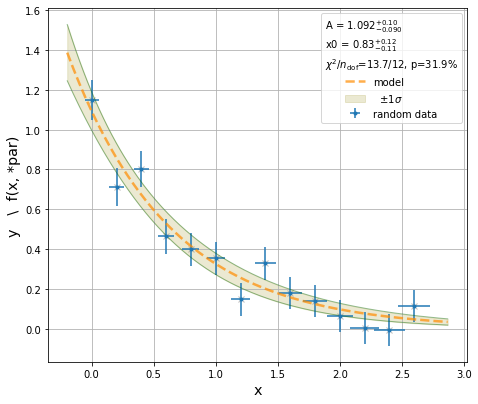

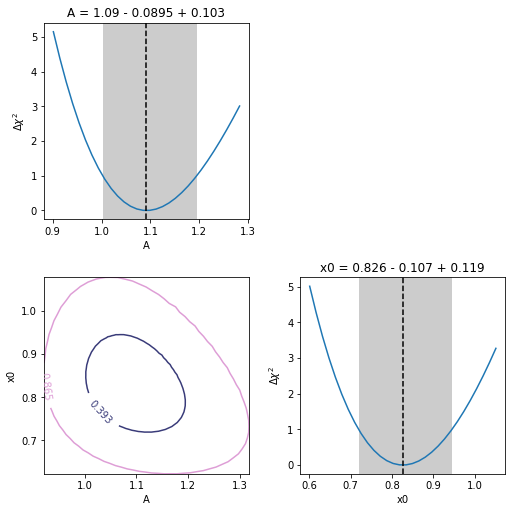


*==* xyFit Result:
 parameter names:        ('A', 'x0')
 chi2: 13.7
 parameter values:       [1.09177775 0.82616785]
 neg. parameter errors:  [-0.08952781 -0.10674633]
 pos. parameter errors:  [0.10265311 0.1187818 ]
 correlations : 
 [[ 1.         -0.27216373]
 [-0.27216373  1.        ]]


In [8]:
 from PhyPraKit.phyFit import mnFit, xyFit

#
# *** Example of an application of phyFit.mFit()
#
# define the model function to fit
def exp_model(x, A=1., x0=1.):
  return A*np.exp(-x/x0)

# another model function
def poly2_model(x, a=0.1, b=1., c=1.):
  return a*x**2 + b*x + c

# set model to use in fit
fitmodel=exp_model  # also try poly2_model !
# get keyword-arguments
mpardict = mnFit.get_functionSignature(fitmodel)[1]
  
# the data ...
data_x = [0.0, 0.2, 0.4, 0.6, 0.8, 1., 1.2,
          1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
data_y = [1.149, 0.712, 0.803, 0.464, 0.398, 0.354, 0.148,
          0.328, 0.181, 0.140, 0.065, 0.005,-0.005, 0.116]
# ... and uncertaities  
sabsy = 0.07 # independent y
srely = 0.05 # 5% of model value
cabsy = 0.04 # correlated
crely = 0.03 # 3% of model value correlated
sabsx = 0.05 # independent x
srelx = 0.04 # 4% of x
cabsx = 0.03 # correlated x
crelx = 0.02 # 2% of x correlated

# perform fit to data with function xyFit using class mnFit
pnams, pvals, perrs, cor, chi2 = xyFit(fitmodel, data_x, data_y,
               sx=sabsx,
               sy=sabsy,
               srelx=srelx,
               srely=srely,
               xabscor=cabsx,
               xrelcor=crelx,
               yabscor=cabsy,
               yrelcor=crely,
#               p0=(1., 0.5),     
#               constraints=['A', 1., 0.03],
#               constraints=[0, 1., 0.03] (alternative)
#               limits=('A', 0., None),  # parameter limits
#               fixPars = ['A'],         # fix parameter(s) 
               use_negLogL=True,
               plot=True,
               plot_band=True,
               plot_cor=True,
               quiet=True,
               axis_labels=['x', 'y   \  f(x, *par)'], 
               data_legend = 'random data',    
               model_legend = 'model')

# Print results 
print('\n*==* xyFit Result:')
print(" parameter names:       ", pnams)
print(" chi2: {:.3g}".format(chi2))
print(" parameter values:      ", pvals)
print(" neg. parameter errors: ", perrs[:,0])
print(" pos. parameter errors: ", perrs[:,1])
print(" correlations : \n", cor)


#### Imports und Voreinstellungen